In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random

Welcome to JupyROOT 6.18/04


In [2]:
# Reload stuff in case you make changes!

importlib.reload(spliland);

### Just make and display one island

In [3]:
f = r.TFile("./calotemplate15.root")
spline0 = spliland.Spline(f.Get("masterSpline_xtal0"))

4 pulses in this island
The energy scale factors are: [8.71030189 5.92936012 2.53431723 3.45242892]
The time offsets are: [16.81404017  1.40504065  6.44133887 11.10195736]
Sampling this spline with a deltaT of 1.25 ns
            


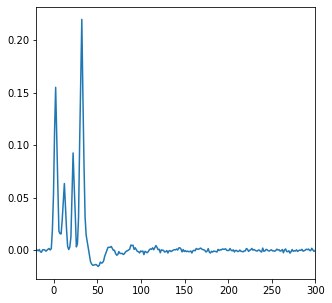

In [26]:
testIsland = spliland.Island(referenceSpline=spline0,
                             minPulses = 4, maxPulses = 4,
                             deltaTmin=0, deltaTmax=25,
                             minTimeOffset=4.5,
                             verbosity=True, noise=True,
                             randomizeTailLength=False)

fig, ax = plt.subplots(1,1);
fig.set_size_inches(5,5);

ax.plot(testIsland.time, testIsland.energy);
ax.set_xlim(-20, 300);
plt.savefig('./template_data/set_4/figures/demo_with_sep45.png', bbox_inches='tight')

### Make a bunch of islands to make sure it doesn't take a million years to do more than one

In [96]:
for index in range(0, 10000):
    testIsland = spliland.Island(referenceSpline=spline0,
                             deltaTmin=0, deltaTmax=25,
                             minTimeOffset=4.5,
                             verbosity=False, noise=True, randomizeTailLength=False)
    if(index % 1000 == 0): print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
